In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [1]:
class DeepNeuralNetwork():
    def __init__(self, size, epoch=10, lr=1e-4):
        self.size = size
        self.epoch = epoch
        self.lr = lr
        self.loss = []
    
        # we save all parameters in the neural network in this dictionary
        self.params = self.initialization()
    
    
    ### Initialization
    def initialization(self):
        # number of nodes in each layer
        input_layer = self.size[0] #13
        hidden1 = self.size[1] #24
        hidden2 = self.size[2] #48
        hidden3 = self.size[3] #24
        output_layer = self.size[4] #1
    
        params = {
            'W1': np.random.randn(hidden1, input_layer),
            'W2': np.random.randn(hidden2, hidden1),
            'W3': np.random.randn(hidden3, hidden2),
            'W4': np.random.randn(output_layer, hidden3),

            'B1': np.random.randn(hidden1, 1),
            'B2': np.random.randn(hidden2, 1),
            'B3': np.random.randn(hidden3, 1),
            'B4': np.random.randn(output_layer, 1)
        }
        return params

    ### Activation function (basic form, derivative form)
    def relu(self, x, derivative=False):
        if derivative==True:
            x[x > 0] = 1
            x[x <= 0] = 0
            return x
        return np.maximum(0, x)


    ### Feedforward
    def forward_pass(self, x_train):
        params = self.params

        params['I'] = x_train.reshape(13, 1)

        params['A1'] = np.dot(params['W1'], params['I']) + params['B1']
        params['R1'] = self.relu(params['A1'])

        params['A2'] = np.dot(params['W2'], params['A1']) + params['B2']
        params['R2'] = self.relu(params['A2'])

        params['A3'] = np.dot(params['W3'], params['A2']) + params['B3'] 
        params['R3'] = self.relu(params['A3'])

        params['O'] = np.dot(params['W4'], params['R3']) + params['B4']

        return params['O']


    def lossfunction(self, output, y_train):
        return (output-y_train)**2



    ### Backpropagation
    def backward_pass(self, y_train, output):
        params = self.params
        change_params = {}

        error_O = output - y_train
        error_R3 = np.multiply( np.dot(params['W4'].T, error_O), self.relu(params['A3'], derivative=True) )
        error_R2 = np.multiply( np.dot(params['W3'].T, error_R3), self.relu(params['A2'], derivative=True) )
        error_R1 = np.multiply( np.dot(params['W2'].T, error_R2), self.relu(params['A1'], derivative=True) )
        
        change_params['W4'] = np.dot(params['R3'], error_O.T).T
        change_params['W3'] = np.dot(params['R2'], error_R3.T).T
        change_params['W2'] = np.dot(params['R1'], error_R2.T).T
        change_params['W1'] = np.dot(params['I'], error_R1.T).T

        change_params['B4'] = np.full(error_O.shape, error_O.mean())
        change_params['B3'] = np.full(error_R3.shape, error_R3.mean())
        change_params['B2'] = np.full(error_R2.shape, error_R2.mean())
        change_params['B1'] = np.full(error_R1.shape, error_R1.mean())

        return change_params


    def update_network_parameters(self, changes_to_params):
        for key, value in changes_to_params.items():
            self.params[key] -= self.lr * value


    def train(self, x_train, y_train):
        start_time = time.time()
        for iteration in range(self.epoch):
            loss_list = []
            for x, y in zip(x_train, y_train):
                output = self.forward_pass(x.reshape(13, 1))
                changes_to_params = self.backward_pass(y.reshape(1, 1), output)
                self.update_network_parameters(changes_to_params)
                loss_list.append(self.lossfunction(float(self.forward_pass(x.reshape(13, 1))), float(y)))
            self.loss.append(np.mean(loss_list))
            if (iteration) % 100 == 0:
                print('Epoch: {0}, Time Spent: {1:.2f}s'.format(
                    iteration, time.time() - start_time
                ))

In [6]:
boston = load_boston()
X = boston.data #(506, 13)
Y = boston.target.T #(506, )
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=42)
dnn = DeepNeuralNetwork(size=[13, 24, 48, 24, 1], epoch=10000, lr=1e-10)
dnn.train(X_train, Y_train)


Epoch: 0, Time Spent: 0.09s
Epoch: 100, Time Spent: 8.65s
Epoch: 200, Time Spent: 17.21s
Epoch: 300, Time Spent: 25.89s
Epoch: 400, Time Spent: 34.43s
Epoch: 500, Time Spent: 43.60s
Epoch: 600, Time Spent: 52.60s
Epoch: 700, Time Spent: 61.57s
Epoch: 800, Time Spent: 70.38s
Epoch: 900, Time Spent: 79.01s
Epoch: 1000, Time Spent: 87.64s
Epoch: 1100, Time Spent: 96.29s
Epoch: 1200, Time Spent: 105.24s
Epoch: 1300, Time Spent: 114.22s
Epoch: 1400, Time Spent: 122.73s
Epoch: 1500, Time Spent: 131.21s
Epoch: 1600, Time Spent: 139.89s
Epoch: 1700, Time Spent: 148.92s
Epoch: 1800, Time Spent: 157.38s
Epoch: 1900, Time Spent: 165.88s
Epoch: 2000, Time Spent: 174.93s
Epoch: 2100, Time Spent: 184.05s
Epoch: 2200, Time Spent: 192.89s
Epoch: 2300, Time Spent: 201.60s
Epoch: 2400, Time Spent: 210.30s
Epoch: 2500, Time Spent: 219.28s
Epoch: 2600, Time Spent: 227.98s
Epoch: 2700, Time Spent: 236.36s
Epoch: 2800, Time Spent: 245.17s
Epoch: 2900, Time Spent: 254.29s
Epoch: 3000, Time Spent: 262.95s
Epo

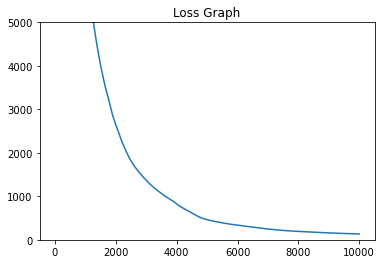

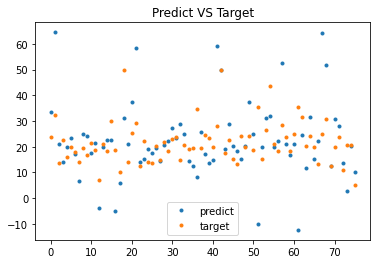

In [9]:
predict = []
for i in range(len(X_val)):
    predict.append(float(dnn.forward_pass(X_val[i])))

plt.figure()
plt.plot(dnn.loss)
plt.title('Loss Graph')
plt.ylim(0, 5000)
#plt.savefig('./DNN_Loss_Graph.png')
plt.show()

plt.figure()
plt.plot(predict, '.', label='predict')
plt.plot(Y_val, '.', label='target')
plt.title('Predict VS Target')
#plt.ylim(0, 100)
plt.legend()
#plt.savefig('./DNN_PredictVSTarget.png')
plt.show()